In [19]:
!pip install arch
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [20]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol

    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

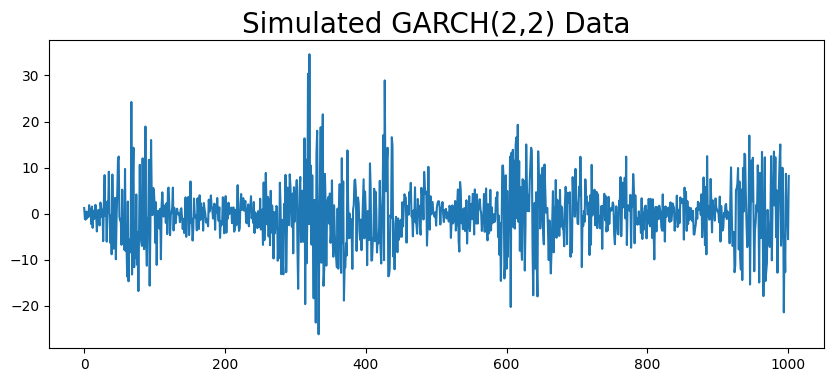

In [21]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

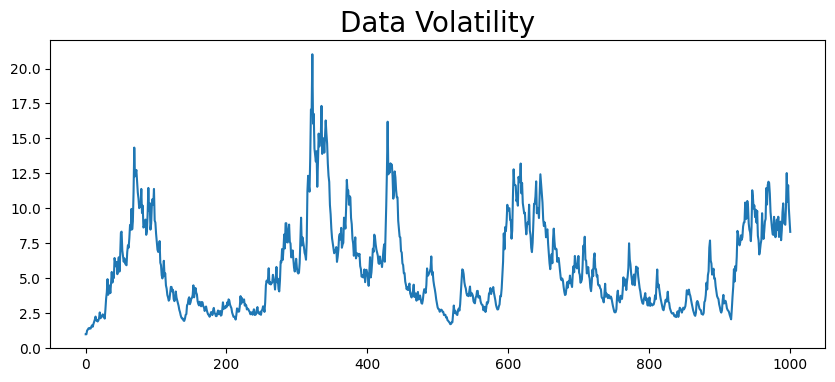

In [22]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

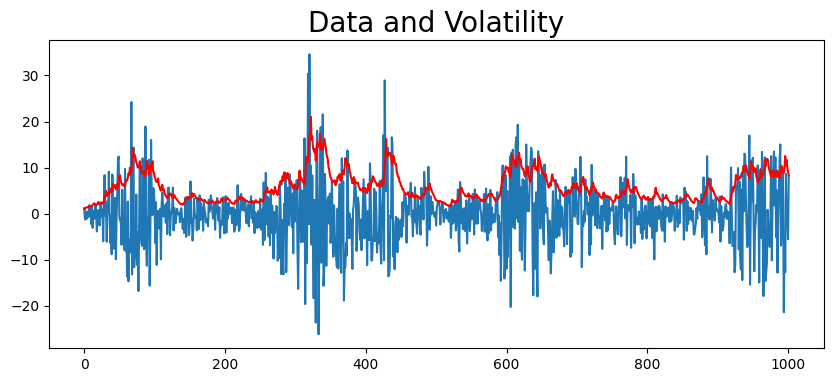

In [23]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

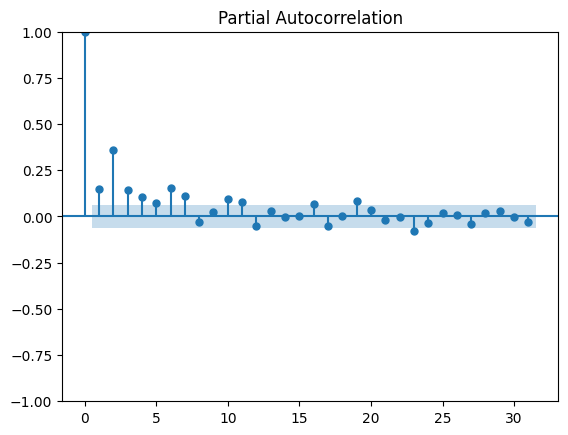

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import numpy as np

plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [25]:
train, test = series[:-test_size], series[-test_size:]

In [26]:
from arch import arch_model
model = arch_model(train, p=2, q=2)

In [27]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 410832.6286972999
Iteration:      2,   Func. Count:     16,   Neg. LLF: 67737.8781417934
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3329.888263505779
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2738.7145454884335
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2721.2223196225304
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2709.7468555336595
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2708.4338621298293
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2708.04141457325
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2708.0116690497393
Iteration:     10,   Func. Count:     79,   Neg. LLF: 2708.0094280109042
Iteration:     11,   Func. Count:     86,   Neg. LLF: 2708.0093171367525
Iteration:     12,   Func. Count:     93,   Neg. LLF: 2708.009309193422
Iteration:     13,   Func. Count:     99,   Neg. LLF: 2708.009309057947
Optimization terminated successfully    (Exit mode 0)
     

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2708.01
Distribution:                  Normal   AIC:                           5428.02
Method:            Maximum Likelihood   BIC:                           5456.85
                                        No. Observations:                  902
Date:                Sat, Nov 29 2025   Df Residuals:                      901
Time:                        23:40:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1169      0.116     -1.005      0.315 [ -0.345,  0.111]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7289      0.262      2.786  5.333e-03   [  0.216,  1.242]
alpha[1]       0.0979  4.454e-02      2.199  2.789e-02 [1.064e-02,  0.185]
alpha[2]       0.2122  7.241e-02      2.930  3.388e-03 [7.025e-02,  0.354]
beta[1]        0.5868      0.233      2.521  1.170e-02   [  0.131,  1.043]
beta[2]        0.1031      0.184      0.560      0.575   [ -0.257,  0.464]
==========================================================================

Covariance estimator: robust
"""

# Predict

In [29]:
predictions = model_fit.forecast(horizon=test_size)

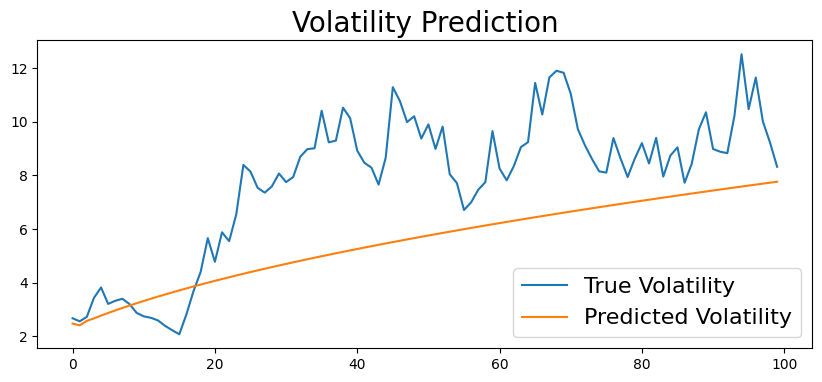

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

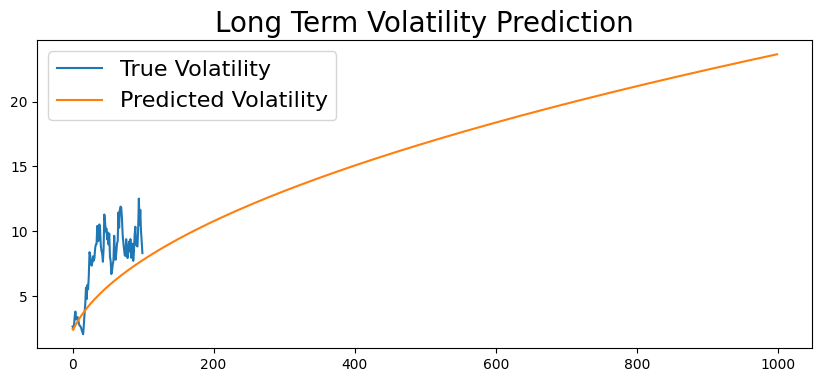

In [31]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [32]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

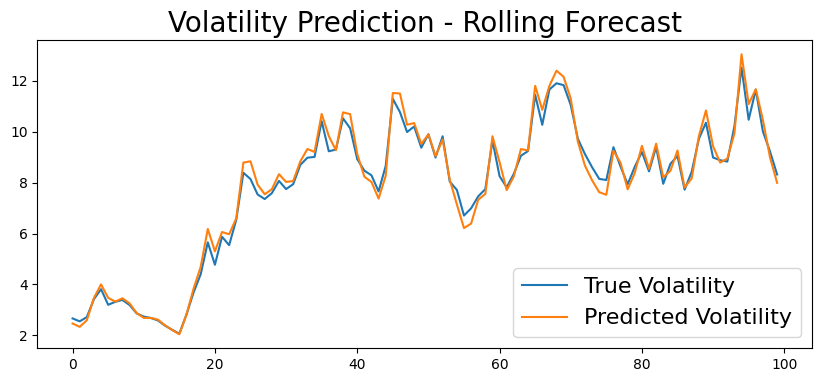

In [33]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)